## Comparing Cross Sections of Different Isotopologues

In this tutorial we create cross sections for two isotopologues of the same molecule and overplot them to see the differences. We strongly recommend reading the Quick Start [Link] guide if you have not done so yet.

First, we must create the cross sections. We choose to use two isotopologues of NO for this example, $^{14}$N$^{16}$O and $^{15}$N$^{16}$O. Let's begin by downloading both line lists from ExoMol. For $^{14}$N$^{16}$O, we just need to specify the molecule and database for the `species` and `database` parameters, and EXCALIBUR will automatically assume the main isotopologue and default line list (which is hard coded) to download. 

In [ ]:
'''Download main isotopologue of NO from ExoMol'''

'''MAKE ISOTOPOLOGUES ARRAY
CROSS SECTION DIFF ISOTOPOLOGUES NOT WORKING'''

from excalibur.core import summon

species = 'NO'
database = 'ExoMol'

summon(database=database, species = species)  # Download line list

To download the line list for $^{15}$N$^{16}$O, we must specify the `isotopologue` parameter. Excalibur assumes the  main isotopologue unless directed otherwise. The convention to specify the isotopologue parameter is most easily explained by some examples: NO becomes 14N-16O, $^{15}$N$^{16}$O becomes 15N-16O, CH4 becomes 12C-1H4. Again, this is only necessary for non-main isotopologues. We also must specify the line list we want to use, since Excalibur only has a default line list for certain molecules, and $^{15}$N$^{16}$O is not one of these. The name for the line list is found by going to the ExoMol website.

In [ ]:
'''Download secondary isotopologue of NO from ExoMol'''

isotopologue = '15N-16O' # Specify isotopologue using Excalibur/ExoMol convention
linelist = 'NOname' # Line list name found on ExoMol website

summon(database=database, species = species, isotope = isotopologue, linelist = linelist)

Now let's compute the cross section for both, at a pressure of 1 bar and temperature of 1000 Kelvin. We make sure to return the wavenumber and absorption cross section to use the data later for plotting.

In [ ]:
from excalibur.core import compute_cross_section

'''Compute cross section for both isotopologues'''

P = 1  # Pressure in bars
T = 1000  # Temperature in Kelvin
input_directory = './input/' # Top level directory containing line lists


nu, sigma = compute_cross_section(species = species, database = database, temperature = T, input_dir = input_directory, 
                      pressure = P)

In [3]:
from excalibur.core import compute_cross_section

'''Compute cross section for both isotopologues'''


species = 'NO'
database = 'ExoMol'

P = 1  # Pressure in bars
T = 1000  # Temperature in Kelvin
input_directory = './input/' # Top level directory containing line lists

nu2, sigma2 = compute_cross_section(isotopologue = '15N-16O', species = species, database = database, temperature = T, input_dir = input_directory, 
                      pressure = P)

Beginning cross-section computations...
Loading ExoMol format
Loading partition function


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Pre-computing Voigt profiles...
Voigt profiles computed in 12.350637708000022 s
Pre-computation steps complete
Generating cross section for NO at P = 1 bar, T = 1000 K
Computing transitions from XABC_v2.h5 | 0.0% complete
Completed 3010226 transitions in 36.709905416000026 s
Calculation complete!
Completed 3010226 transitions in 36.828238874999954 s

Total runtime: 53.35628995800005 s


Finally, we add the returned arrays to a collection and plot. The first code statement adds the $^{14}$N$^{16}$O cross section (where nu is the x-axis and sigma is the y-axis) to an empty collection of cross sections. The parameter `collection = []` is assumed if the parameter is not assigned another value. In the second statement, we do the same thing, but assign `cross_section` to the `collection` parameter so that the $^{15}$N$^{16}$O cross section is added to an array that already contains the $^{14}$N$^{16}$O cross section. The last statement plots the data with the 3 required parameters, the collection of cross sections, labels for each of the cross sections, and the resulting file name. 

25000.0
200.0

Plotting complete.


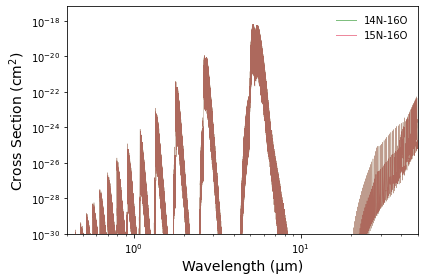

In [6]:
from excalibur.plot import cross_section_collection, plot_cross_section, read_cross_section_file

'''Plot both cross sections on the same plot'''

cross_sections = []

nu, sigma = read_cross_section_file('NO', 'ExoMol', 'NO_T1000K_log_P0.0_sigma.txt')

cross_sections = cross_section_collection(new_x = nu, new_y = sigma, collection = cross_sections)  # Add first cross section to collection

cross_sections = cross_section_collection(new_x = nu2, new_y = sigma2, collection = cross_sections) # Add second cross section to collection, making sure to specify the previous collection as a parameter

plot_cross_section(collection = cross_sections, labels = ['14N-16O', '15N-16O'], filename = 'Different_Isotopologues')